In [1]:
import cf
import cfplot as cfp
import numpy as np

In [2]:
# change to your suite-id to pick up the required file
runid='cq988'
# time points and pseudo-levels to select
# 2nd time point (02:00:00)
tlev=cf.hour(cf.eq(2))
# 3rd pseudo-level, remembering that python starts counting at 0
pslev=2

In [3]:
datafile='/home/vagrant/cylc-run/u-'+runid+'/work/1/atmos/atmosa.pa19810901_00'
indata=cf.read(datafile, select=['stash_code=2285','stash_code=2300','stash_code=2301','stash_code=2302','stash_code=2303','stash_code=2304','stash_code=2305'])

In [4]:
# create a field to hold the AOD, and set the required variable names
aod=indata[0].subspace(**{'id%UM_pseudolevel': [pslev]}, T=tlev).squeeze().copy()
aod.nc_set_variable('od550aer')
aod.set_property('standard_name','atmosphere_optical_thickness_due_to_aerosol')
aod.set_property('long_name','atmosphere optical thickness due to aerosol')
# initialise the field to zero prior to the sum
aod.data=np.zeros(aod.data.shape)

In [5]:
# sum-up the various components of AOD
for f in indata:
    ff=f.subspace(**{'id%UM_pseudolevel': [pslev]}, T=tlev).squeeze()
    aod.data=aod.data+ff.data

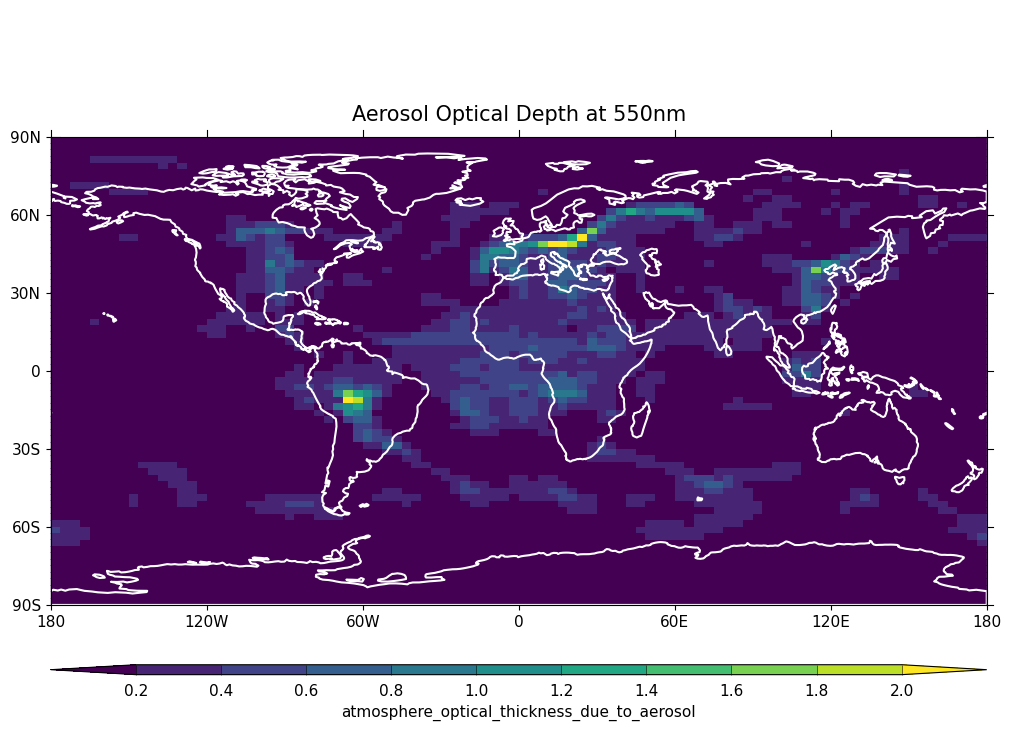

In [6]:
# plot the AOD
# change the colours of the continents to make the clearer to see
cfp.setvars(continent_color='w')
cfp.con(aod, blockfill_fast=True, lines=False, title='Aerosol Optical Depth at 550nm')

In [7]:
# save the AOD field in NetCDF format
cf.write(aod, '/home/vagrant/Task126_AOD.nc', fmt='NETCDF4')